In [ ]:
#!pip3 install tweepy

In [1]:
import tweepy as tw

In [2]:
import json, datetime, time

In [ ]:
bearer_token='XXXX'

In [ ]:
#!pip3 install tweepy
import tweepy as tw
import json, datetime, time
bearer_token='XXXXX'

class MyStreamingClient(tw.StreamingClient):
    '''def on_tweet(self, tweet):
        print(tweet.id)
        print(tweet.text)
        print('--------')      
client = MyStreamingClient(bearer_token)
rule_ids = []
if client.get_rules().data is not None:
    for rule in client.get_rules().data:
        rule_ids.append(rule.id)
        client.delete_rules(rule_ids)
        print('Rules are deleted')
client.add_rules(tw.StreamRule("Covid19"))
client.filter()'''
    def on_connect(self):
        print('Connection to Twitter API is successful.')
        self.tweet_count = 0 # initially tweet count is 0
    
    def on_tweet(self, tweet):
        self.tweet_count += 1 # every time there is a new tweet, count is increased by one
        print("Tweet count: ", self.tweet_count)
        tw_file = open('trudeau.json','a')
        tw_file.write( str(json.dumps(tweet.data))+'\n')
        tweet_number_limit = 1000
        if self.tweet_count >= tweet_number_limit:
            sys.exit(0)

client = MyStreamingClient(bearer_token)

rule_ids = []

if client.get_rules().data is not None:

    for rule in client.get_rules().data:
        rule_ids.append(rule.id)

        client.delete_rules(rule_ids)
        print('Rules are deleted')
        
client.add_rules(tw.StreamRule("Trudeau lang:en -is:retweet"))
client.filter()
        


In [6]:
#!pip install WordCloud

In [71]:
 #!pip install seaborn

In [3]:
from datetime import date
#import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy


C:\Users\ilkca\anaconda3\envs\Proje_1\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\ilkca\anaconda3\envs\Proje_1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
file_name = 'trudeau.json'

with open(file_name,'r') as file:
    lines = file.readlines()   


In [12]:
lines[0]

'{"edit_history_tweet_ids": ["1591120031672598531"], "id": "1591120031672598531", "text": "@SpeakerPelosi Make no mistake, nobody wants that. We want 2 dollar gas and 1.4% inflation."}\n'

In [13]:
#text = str(lines)

In [14]:
import scipy.integrate as integrate
import scipy


In [18]:
# Creating a dataframe from the tweets list above
tweets_to_df = pd.DataFrame(lines, columns=['Tweets'])
#tweets_to_df.head()

In [20]:
#clean the tweets with a function
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @ mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('%','',text)
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    text = re.sub(r'[^\w\s]', '', text)
   # df['FSA'].str.replace('p', '')
    text = text.replace("edit_history_tweet_ids", " ")
    text = text.replace("id", '')
    text= text.replace("text", '')
    text = ''.join((x for x in text if not x.isdigit()))
   
    return text
tweets_to_df['cleanedTweets'] = tweets_to_df['Tweets'].apply(cleanTweets) #apply cleanTweet function to the tweet
tweets_to_df.head() #compares original tweets with cleaned Tweets


,Tweets,cleanedTweets
0,"{""edit_history_tweet_ids"": [""15911200316725985...",Make no mistake nobody wants that We wa...
1,"{""edit_history_tweet_ids"": [""15911200319619727...",US leadership restored on the world sta...
2,"{""edit_history_tweet_ids"": [""15911200338490368...",Is the clown emoji the extent of your p...
3,"{""edit_history_tweet_ids"": [""15911200336984268...",Youure obviously brainwa...
4,"{""edit_history_tweet_ids"": [""15911200325785600...",so then the border patrol is doing thei...


In [21]:
tweets_to_df['Tweets'][0]

'{"edit_history_tweet_ids": ["1591120031672598531"], "id": "1591120031672598531", "text": "@SpeakerPelosi Make no mistake, nobody wants that. We want 2 dollar gas and 1.4% inflation."}\n'

In [22]:
tweets_to_df['cleanedTweets'][0]

'       Make no mistake nobody wants that We want  dollar gas and  inflation '

In [24]:
#tweets_to_df['cleanedTweets']

In [25]:
tweets_to_df.to_csv('tweets_trudeau.csv') #write dataframe into csv file
savedTweets = pd.read_csv('tweets_trudeau.csv',index_col=0) #reads csv file

## TextBlob

In [37]:
#get subjectivity and polarity of tweets with a function
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
savedTweets['Subjectivity'] = savedTweets['cleanedTweets'].apply(getSubjectivity)
savedTweets['Polarity'] = savedTweets['cleanedTweets'].apply(getPolarity)
savedTweets.drop('Tweets', axis=1).head() #shows polarity and subjectivity of each tweet and drops the uncleaned tweets column

,cleanedTweets,Subjectivity,Polarity,Analysis
0,Make no mistake nobody wants that We wa...,0.10,0.200000,Positive
1,US leadership restored on the world sta...,0.60,-0.150000,Negative
2,Is the clown emoji the extent of your p...,0.55,-0.400000,Negative
3,Youure obviously brainwa...,0.80,-0.066667,Negative
4,so then the border patrol is doing thei...,0.90,0.600000,Positive


In [27]:
#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
savedTweets['Analysis'] = savedTweets['Polarity'].apply(getAnalysis)

In [28]:
savedTweets['Analysis'].value_counts() #shows the counts of tweets' polarity

Neutral     1714
Positive    1463
Negative     912
Name: Analysis, dtype: int64

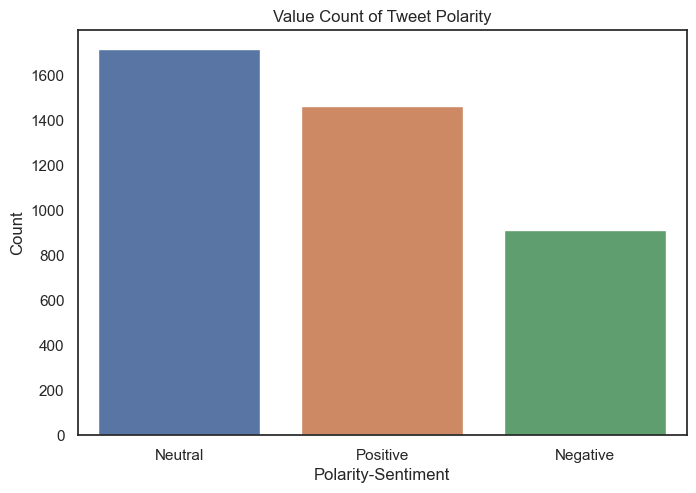

In [66]:
#plot a bar graph to show count of tweet sentiment

import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')
#create grouped bar chart
fig = plt.figure(figsize=(7,5))
sns.countplot (x=savedTweets['Analysis'], data=savedTweets, order=savedTweets['Analysis'].value_counts().index)
plt.title('Value Count of Tweet Polarity')
plt.ylabel('Count')
plt.xlabel('Polarity-Sentiment')
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'Distribution of polarity')

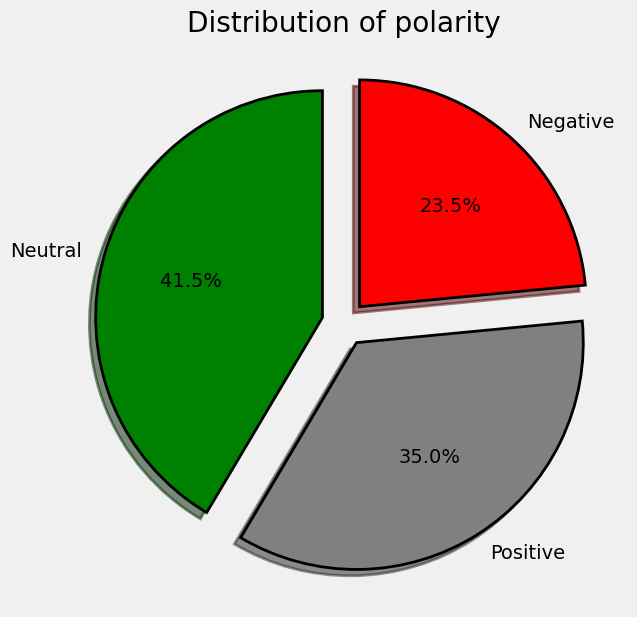

In [68]:
#pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(7,7))
colors = ('green', 'grey', 'red')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=savedTweets['Analysis'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of Polarity')

In [39]:
#create a function to check negative, neutral and positive analysis
def getAnalysis1(score):
    if score<0.5:
        return 'Negative'
    elif score ==5:
        return 'Neutral'
    else:
        return 'Positive'
    
savedTweets['Subjectivity1'] = savedTweets['Subjectivity'].apply(getAnalysis1)

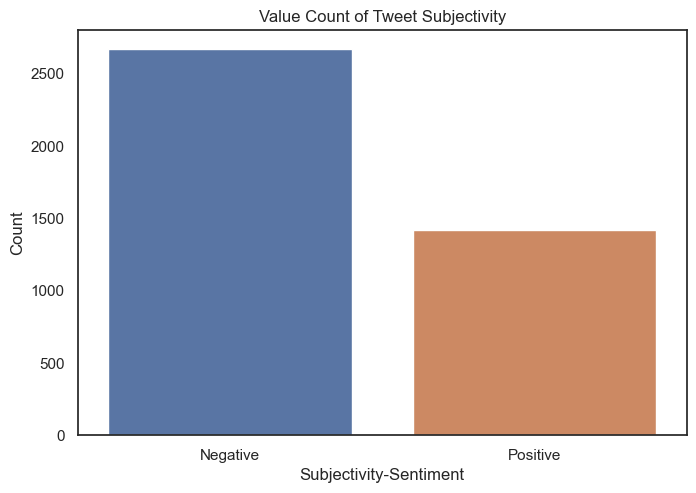

In [65]:
#plot a bar graph to show count of tweet sentiment

import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')
#create grouped bar chart
fig = plt.figure(figsize=(7,5))
sns.countplot (x=savedTweets['Subjectivity1'], data=savedTweets, order=savedTweets['Subjectivity1'].value_counts().index)
plt.title('Value Count of Tweet Subjectivity')
plt.ylabel('Count')
plt.xlabel('Subjectivity-Sentiment')
plt.grid(False)
plt.show()

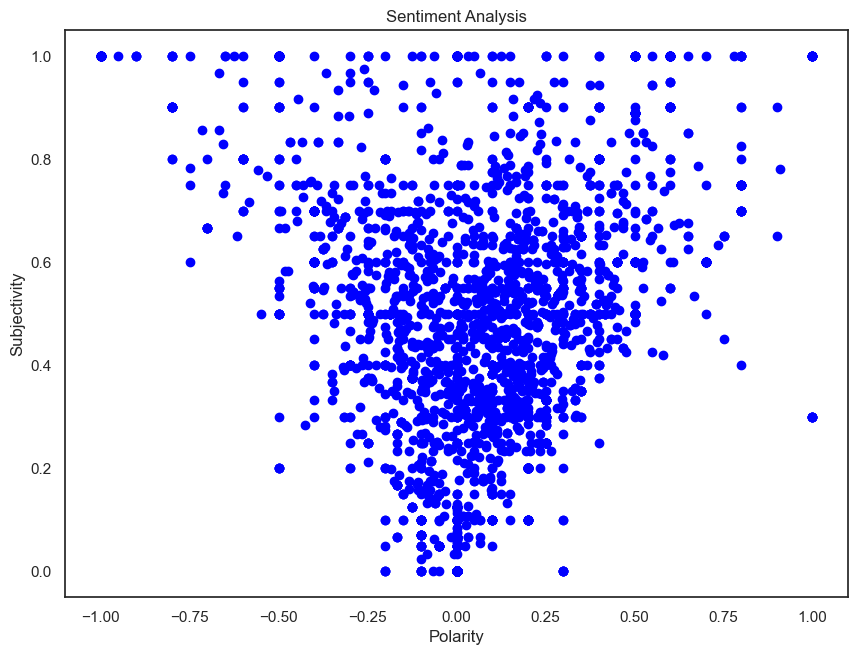

In [41]:
#plot the polarity and subjectivity on a scatter plot
plt.figure(figsize=(9,7))
for i in range(0,savedTweets.shape[0]):
    plt.scatter(savedTweets['Polarity'][i],savedTweets['Subjectivity'][i], color='purple')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

## WordCloud

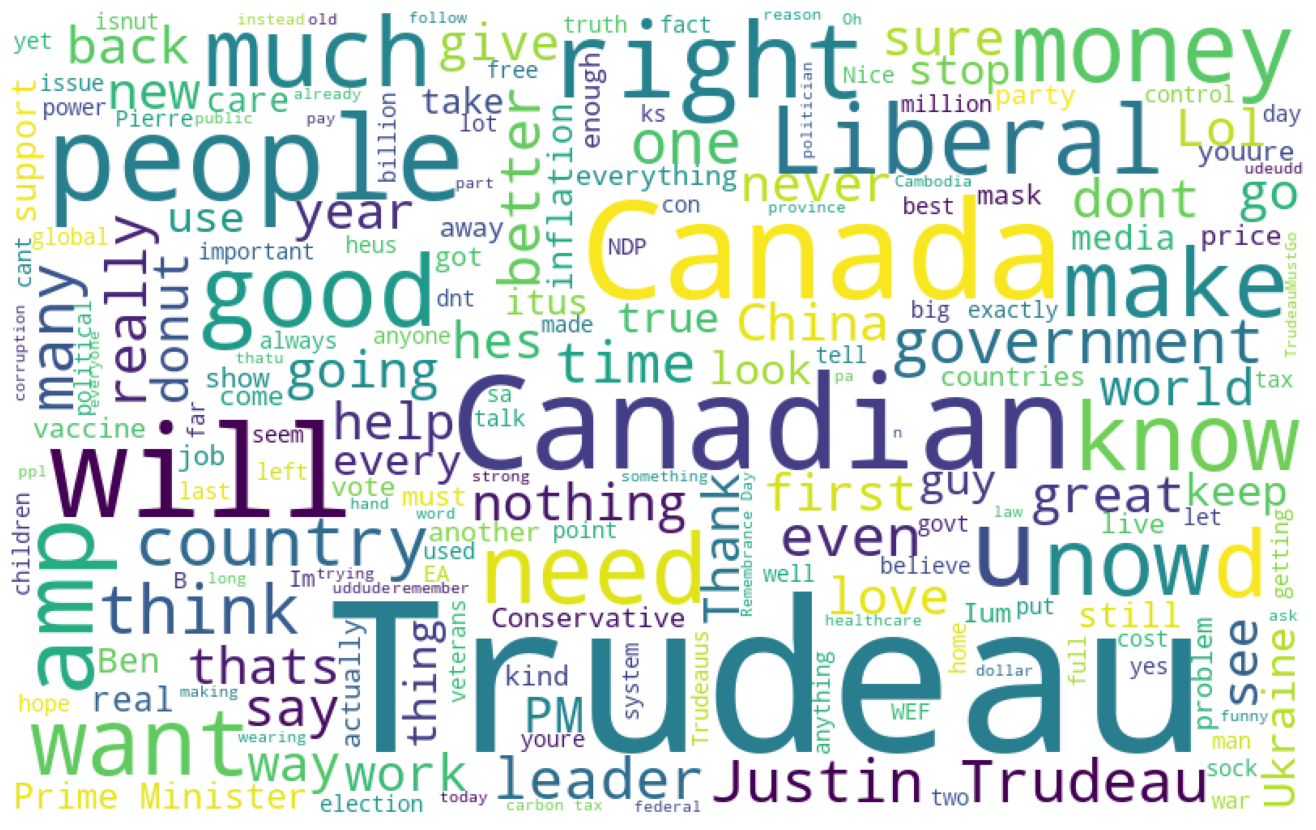

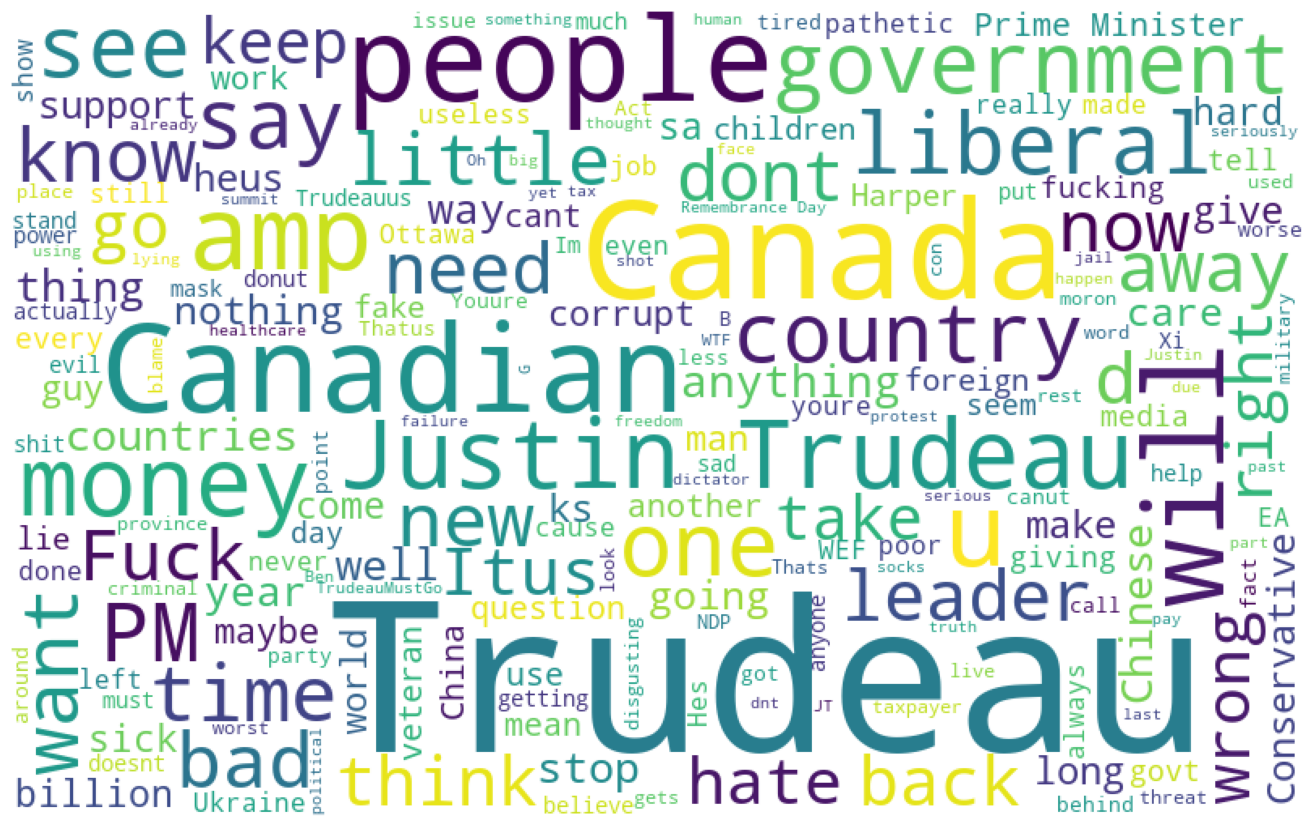

In [42]:
#create a function for wordcloud
def create_wordcloud(text):    
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='red', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()
#wordcloud for positive tweets
posTweets = savedTweets.loc[savedTweets['Analysis']=='Positive', 'cleanedTweets']
create_wordcloud(posTweets)
#wordcloud for negative tweets
negTweets = savedTweets.loc[savedTweets['Analysis']=='Negative', 'cleanedTweets']
create_wordcloud(negTweets)


## Afinn

In [43]:
#!pip install afinn

In [44]:
import afinn

In [45]:
afin = afinn.Afinn()

In [46]:
#get subjectivity and polarity of tweets with a function
def getafin(text1):
    return afin.score(text1)

savedTweets['afin'] = savedTweets['cleanedTweets'].apply(getafin)

savedTweets.drop('cleanedTweets', axis=1).head() #shows polarity and subjectivity of each tweet and drops the uncleaned tweets column

,Tweets,Subjectivity,Polarity,Analysis,Subjectivity1,afin
0,"{""edit_history_tweet_ids"": [""15911200316725985...",0.10,0.200000,Positive,Negative,-2.0
1,"{""edit_history_tweet_ids"": [""15911200319619727...",0.60,-0.150000,Negative,Positive,2.0
2,"{""edit_history_tweet_ids"": [""15911200338490368...",0.55,-0.400000,Negative,Positive,-2.0
3,"{""edit_history_tweet_ids"": [""15911200336984268...",0.80,-0.066667,Negative,Positive,-6.0
4,"{""edit_history_tweet_ids"": [""15911200325785600...",0.90,0.600000,Positive,Positive,3.0


In [52]:
#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
savedTweets['Afin_Analysis'] = savedTweets['afin'].apply(getAnalysis)

In [54]:
savedTweets['Afin_Analysis'].value_counts()

Negative    1524
Neutral     1430
Positive    1135
Name: Afin_Analysis, dtype: int64

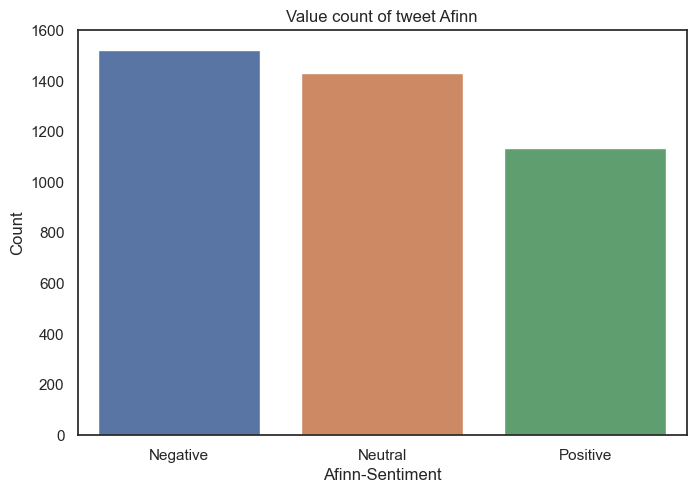

In [64]:
#plot a bar graph to show count of tweet sentiment
fig = plt.figure(figsize=(7,5))
sns.countplot (x=savedTweets['afin_analysis'], data=savedTweets, order=savedTweets['afin_analysis'].value_counts().index)
plt.title('Value count of tweet Afinn')
plt.ylabel('Count')
plt.xlabel('Afinn-Sentiment')
plt.grid(False)
plt.show()

## Pysentimiento

In [56]:
#pip install pysentimiento

In [57]:
from pysentimiento import create_analyzer
#analyzer= create_analyzer(task="sentiment", lang="es") 
analyzer = create_analyzer(task="emotion", lang="en")

In [58]:
analyzer1 = create_analyzer(task="sentiment", lang="en")

loading configuration file config.json from cache at C:\Users\ilkca/.cache\huggingface\hub\models--finiteautomata--bertweet-base-sentiment-analysis\snapshots\cf6b0f60e84096e077c171fe3176093674370291\config.json
Model config RobertaConfig {
  "_name_or_path": "finiteautomata/bertweet-base-sentiment-analysis",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "NEG",
    "1": "NEU",
    "2": "POS"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "NEG": 0,
    "NEU": 1,
    "POS": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 130,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "proble

In [60]:
def getpysen(text):
    return analyzer.predict(text).output

savedTweets['Pysen'] = savedTweets['cleanedTweets'].apply(getpysen)

savedTweets.drop('cleanedTweets', axis=1).head() #show emotions of each tweet and drops the uncleaned tweets column

,Tweets,Subjectivity,Polarity,Analysis,Subjectivity1,afin,afin_analysis,Afin_Analysis,Pysen
0,"{""edit_history_tweet_ids"": [""15911200316725985...",0.10,0.200000,Positive,Negative,-2.0,Negative,Negative,disgust
1,"{""edit_history_tweet_ids"": [""15911200319619727...",0.60,-0.150000,Negative,Positive,2.0,Positive,Positive,disgust
2,"{""edit_history_tweet_ids"": [""15911200338490368...",0.55,-0.400000,Negative,Positive,-2.0,Negative,Negative,disgust
3,"{""edit_history_tweet_ids"": [""15911200336984268...",0.80,-0.066667,Negative,Positive,-6.0,Negative,Negative,disgust
4,"{""edit_history_tweet_ids"": [""15911200325785600...",0.90,0.600000,Positive,Positive,3.0,Positive,Positive,others


In [62]:
savedTweets['Pysen'].value_counts() 

disgust     1888
others      1685
anger        346
joy           98
sadness       29
surprise      24
fear          19
Name: Pysen, dtype: int64

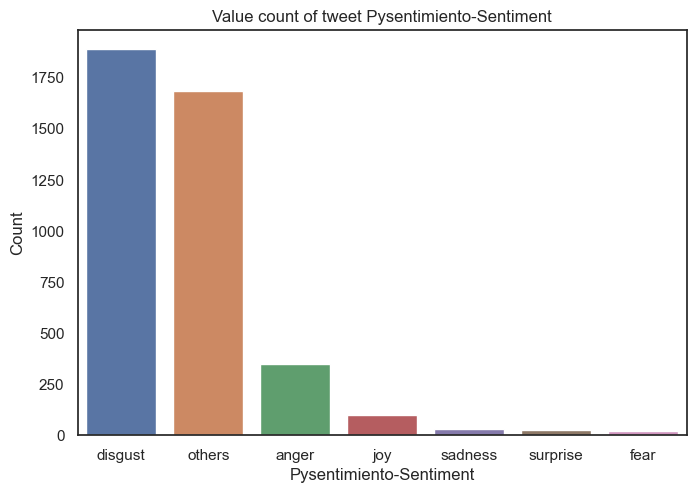

In [63]:
#plot a bar graph to show count of tweet sentiment

import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')
#create grouped bar chart
fig = plt.figure(figsize=(7,5))
sns.countplot (x=savedTweets['Pysen'], data=savedTweets, order=savedTweets['Pysen'].value_counts().index)
plt.title('Value count of tweet Pysentimiento-Sentiment')
plt.ylabel('Count')
plt.xlabel('Pysentimiento-Sentiment')
plt.grid(False)
plt.show()